### Import Necessary Module and Set Path 

In [1]:
import sqlite3 as lite
import os
import sys
import collections
sys.path.insert(0, '../../scripts/')
jupyter_directory = os.getcwd()

In [2]:
import analysis as an

## Run Cyclus Input file

In [11]:
! rm eu_future.sqlite
! cyclus -o eu_future.sqlite eu_future.xml

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

### The output file should be named 
         
          eu_future.sqlite

In [3]:
# Wait for the `Cyclus run successful!' message to move on


cur = an.get_cursor('buff_but_Sink.sqlite')

# get simulation time info
init_year, init_month, duration, timestep = an.get_timesteps(cur)

# prints net capacity and number of reactor timeseries
# an.plot_power(cur)

# natural uranium demand
dictionary = collections.OrderedDict()
dictionary['natural_uranium'] = an.nat_u_timeseries(cur)
an.stacked_bar_chart(dictionary, timestep,
                     'Years', 'Natural Uranium Mass in Tons',
                     'Natural Uranium Demand vs Time',
                     'nat_u', init_year)

print('Total Natural U in MTHM:')
print(max(dictionary['natural_uranium']))

# get spent fuel timeseries
agent_ids = an.get_agent_ids(cur, 'Sink')
snf_dict = an.facility_commodity_flux(cur, agent_ids, ['uox_waste','french_uox_waste', 'mox_waste'],
                                        False)
an.stacked_bar_chart(snf_dict, timestep,
                     'Years', 'Mass [MTHM]',
                     'Spent Fuel Mass vs Time',
                     'snf', init_year)

# get spent fuel timeseries separated by region

agent_ids = an.get_agent_ids(cur, 'Sink')
comm_dict = an.commodity_flux_region(cur, agent_ids, ['uox_waste', 'french_uox_waste'], False)
an.stacked_bar_chart(comm_dict, timestep,
                     'Years', 'Mass [MTHM]',
                     'Spent Fuel by Region vs Time',
                     'regional_snf', init_year)


print('Total UOX Waste in MTHM:')
# print(max([x + y for x, y in zip(snf_dict['uox_waste'], snf_dict['french_uox_waste'])]))
print('Total MOX Waste in MTHM:')
print(max(snf_dict['mox_waste']))

# get fuel usage timeseries in stacked bar chart
fuel_dict = an.fuel_usage_timeseries(cur, ['uox', 'mox'])
an.stacked_bar_chart(fuel_dict, timestep,
                  'Years', 'Mass[MTHM]',
                  'Total Fuel Mass vs Time',
                  'total_fuel',
                  init_year)
an.multi_line_plot(fuel_dict, timestep,
                   'Years', 'Mass[MTHM]',
                   'Fuel Mass vs Time',
                   'fuel', init_year)

print('Total UOX usage in MTHM:')
print(max(fuel_dict['uox']))
print('Total MOX usage in MTHM:')
print(max(fuel_dict['mox']))

# get tailings timeseries
agent_ids = an.get_agent_ids(cur, 'enrichment')
tails_dict = an.facility_commodity_flux(cur, agent_ids, ['tailings'], True)
an.multi_line_plot(tails_dict, timestep, 'Years', 'Mass [MTHM]', 'Tailings Mass vs Time',
                   'tailings', init_year)
print('Total Tailings in MTHM:')
print(max(tails_dict['tailings']))

print('Finished!')

Total Natural U in MTHM:
1251658.02191
Sink_Source_Inst has no values
Total UOX Waste in MTHM:
Total MOX Waste in MTHM:
679.3732
Total UOX usage in MTHM:
178865.0146
Total MOX usage in MTHM:
8909.3148
Total Tailings in MTHM:
1072033.3117
Finished!


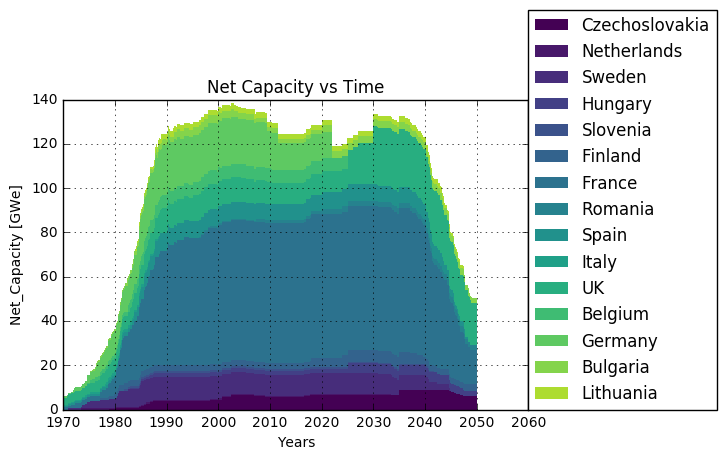

In [4]:
# Display Net Capacity vs Time
from IPython.display import Image
Image(filename='power_plot.png')

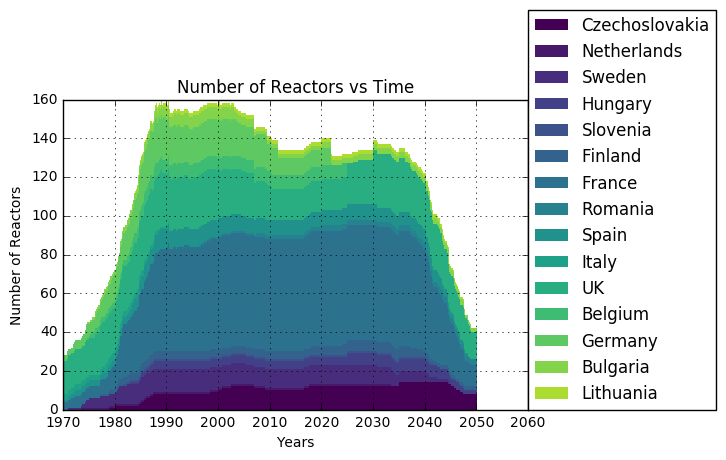

In [5]:
# Display Number of Reactors vs Time
from IPython.display import Image
Image(filename='num_plot.png')

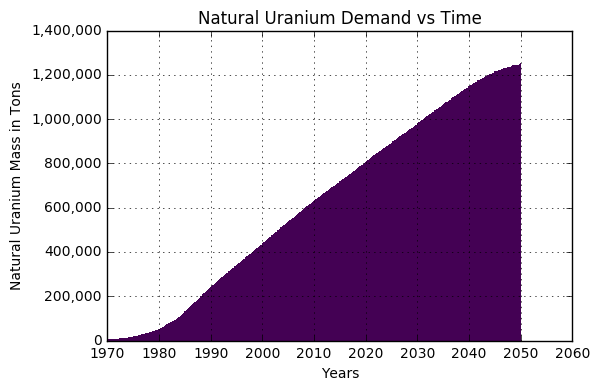

In [6]:
# Display natural U demand  vs Time
from IPython.display import Image
Image(filename='nat_u.png')

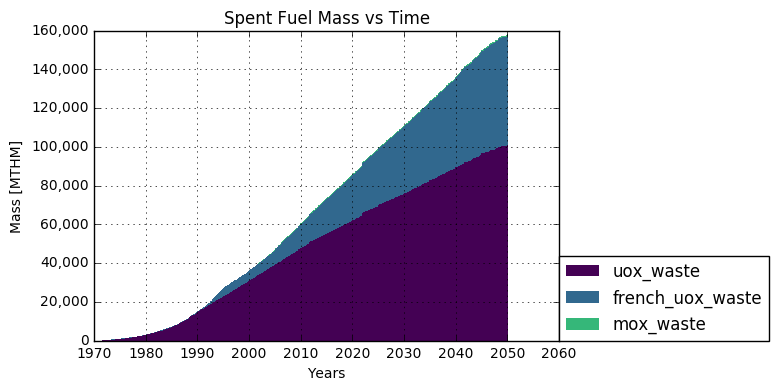

In [7]:
# Display spent fuel vs Time
from IPython.display import Image
Image(filename='snf.png')

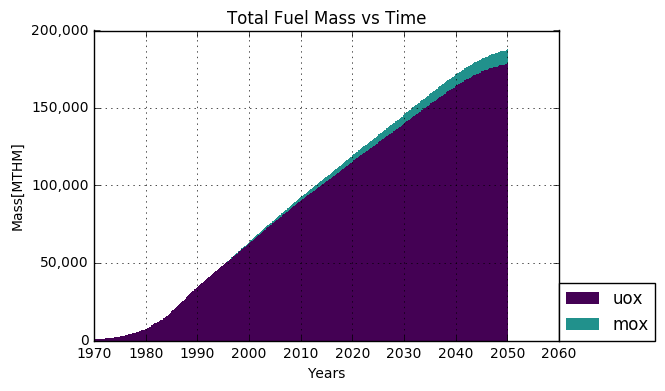

In [8]:
# Display total fuel usage  vs Time
from IPython.display import Image
Image(filename='total_fuel.png')

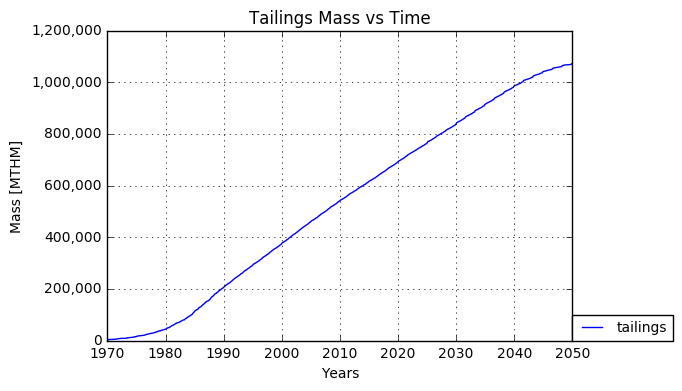

In [9]:
# Display tailings  vs Time
from IPython.display import Image
Image(filename='tailings_tailings.png')